<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-Summary" data-toc-modified-id="Project-Summary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project Summary</a></span></li><li><span><a href="#Application" data-toc-modified-id="Application-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Application</a></span></li><li><span><a href="#Problem-statement" data-toc-modified-id="Problem-statement-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Problem statement</a></span></li><li><span><a href="#Data-Sources" data-toc-modified-id="Data-Sources-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Sources</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Correlations" data-toc-modified-id="Correlations-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Correlations</a></span></li><li><span><a href="#Distributions" data-toc-modified-id="Distributions-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Distributions</a></span><ul class="toc-item"><li><span><a href="#Numeric-variables" data-toc-modified-id="Numeric-variables-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Numeric variables</a></span></li><li><span><a href="#Binary-variables" data-toc-modified-id="Binary-variables-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Binary variables</a></span></li><li><span><a href="#Categorical-variables" data-toc-modified-id="Categorical-variables-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Categorical variables</a></span></li></ul></li></ul></li></ul></div>

## Project Summary
The goal of this project is to predict hotel property prices, using a data set of transaction prices merged with a survey containing numerous attributes of the sold properties. Traditionally, properties have predominantly been priced by human experts. However, this is not only expensive, but the result tends to be an extensive focus on the particularities of the property, and an insufficient attention to up-swings and down-swings in the market. While quantitative approaches that model a hotel's sale price as a function of various attributes are also commonly used by practitioners, they commonly use linear regression because of its easy estimation and good interpretability.  My goal here is to convince practitioners that machine learning models that are able to model more complex relationships between variables offer a better alternative because of their substantially better accuracy.  

## Application
There are two distinct use cases for the resulting models.  The most obvious one is investors deciding how much to pay for a specific hotel.  The second use is pricing hotel properties for a company's balance sheet.  Since the first case requires greater accuracy, we might want to supplement our prediction with the findings from a detailed inspection of the particular property; thus, the second case is the most direct application area of the models developed here.

## Problem statement
Most existing quantitative models of hotel property prices use a simple linear model.Its advantage is its easy estimation and good interpretability. But while interpretability is good to have, it is attained by sacrificing fit: Most relationships in the world are not linear, and therefore it is not be possible in most situations to tell a simple story that sums up the effect of a particular variable in a single number, because this effect usually depends both on the level of the variable in question, as well as on the value of other variables. 

(Note that I do not contend the fact that most phenomena can be well approximated linearly for nearby points (first-order Taylor Approximation).  An example of a regression model based on linear local approximation is LOESS regression, but ordinary linear regression is based on a  linear global approximation.)

Of course, linear models are to some extent able to model non-linear relationships by including transformations of the original features. Leaving aside the log transformation – which still models linear effects on a percentage scale (constant elasticities), this mainly leaves polynomials or dummy variables to model "real" nonlinearities.  However, this strategy has has a number of limitations. Firstly, this does not provide much flexibility of the shape that the non-linear effects may take. For example, the effect of a building's age may not resemble any smooth polynomial, but rather may move up and down haphazardly depending on how fashionable the building style of the era the hotel was built in is considered now.  
If, on the other hand, we model this effect by including the dummy variable for, say, each decade, this uses up a lot of degrees of freedom (especially if we do this for all predictors).  Furthermore, it forces us to make a lot of decisions about how to divide up a continuous variables into discrete categories. Since this choice in part depends on how much nonlinearity this procedure reveals, it requires fitting many different models.  This in turn brings with it the danger of overfitting – unless we reserve a separate test set to evaluate our model, which unfortunately is not standard practice outside of machine learning.
 
An even more important downside of polynomials – the most common way to model nonlinearities – is that they tend to behave erratically far away from the mean. This is already a problem if we include square terms, but gets even worse if we use higher powers.  Note, again, that square terms only allow us to model a relatively simple form of nonlinearity, so including higher order powers is necessary if we wanted to model more complex shapes. 
This behavior of polynomials does indeed cause problems for a situation such as ours: While the age of most hotels will fall in a relatively narrow range, there will be a few observations that are much older.  Polynomials are not only likely to give us predictions there are far off for these data points, but the fact that ordinary linear regression minimizes a quadratic loss function also means that the fit for the other data points will be compromised in order to avoid creating too extreme outliers for the other points.

While there exist extensions to regression analysis such as LOESS or smoothing splines that are able to model more complex shapes, these also come with a number of assumptions about the distribution of the data. I instead rely on gradient boosting, which is known to provide top performance on anything but huge data sets (where deep learning would be the top choice).  The particular variant of gradient boosting I choose is XGBoost, which is particularly accurate and fast.
Of course, we most likely would get even higher accuracy from using an ensemble of different models, but I leave this for future iterations of this project. 

The main downside of gradient boosting – as well as any other machine learning algorithm that models  complex relationship between the variables – is that it is harder for a human observer to interpret the results.  We only get the predictions, plus a measure of which features are most important in generating these predictions.  However, by contrast to OLS, this does not tell us how much of an impact a one-unit increase of a predictor has, or even whether it has a positive or negative impact (or both, depending on the value of other variables).  However, as I argued above, this is not really a fault of the model, but rather is due to the fact that most relationships we observe in the world are simply too complex to be captured by any simple summary.  
In order to get at least a rough idea of the effect of specific predictors, I will use a resampling technique to visualize the effect of a single variable of interest, building age.  If we ignore interaction effects, we can compute the variable's average effect by randomly drawing observations, assigning them a random value for age, and computing a prediction for this observation.  If we do this a large number of times, we can plot the predicted sale price as a function of age.

## Data Sources
The data used come from two  proprietary data sets. One contains records of hotel property sales, but it does not provide very rich information about the attributes of each property.  Thus, I supplement it with a second data set consisting of a survey of hotels.
However, the data sets stem from two waves.  The older observations already came in merged form (and unfortunately I did not have access to the original data set). For the newer observations, I had to merge the transaction data with the survey of hotel attributes.

## Exploratory Data Analysis
For the exploratory data analysis, I focus on looking for any evidence that suggests data problems that were overlooked during the data cleaning process. As I explained in more detail in my previous capstone project, I ignore what the plots may suggest about things like which variables are strongly correlated with our target variable (sale price), or which variables seem to have a non-linear effect. One reason for this decision is that plots usually only are able to the relationships between at most three variables at a time.  As a result, the "insights" that we may seem to glean from these plots can be highly misleading, because they can be fraught with things such as spurious correlations.  

A second reason is that my primary machine learning model, XGBoost, does not make many assumptions on the distribution of the data.  For example, it is not affected by outliers or non-normal distributions, since the strategy of iterative splits treats each variable as ordinal. This also allows XGBoost to flexibly model non-linear effects.


Let's get started by loading necessary libraries, as well as the data.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.externals import joblib

# Set up pandas table display
pd.set_option('display.width', 120)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

# Set plotting options
sns.set() # Use seaborn defaults for plotting
%matplotlib inline 

In [2]:
# Load data from previous notebook
all_data = pd.read_csv('../data_raw/all_data.csv')

In [3]:
all_data.head(2)

,Unnamed: 0,age,allsuites,boutique,casino,cbd,category,conference,convention,floors,golf,indoorcorridors,landsf,largestmeetingspace,location,msa,multiproperty,new,operation,portfolio,quarter,resort,restaurant,rooms,saleaffiliation,saleprice,sizesf,ski,spa,id,tract,year,log1_landsf,log1_age,log1_largestmeetingspace,log_saleprice,log_sizesf,log_rooms,log_floors,year_2,year_3,age_2,age_3,floors_2,land,selfrun
0,0,48.0,0.0,0.0,0.0,0.0,Economy Class,0.0,0.0,2.0,0.0,0.0,130301.0,2000.0,Small Metro/Town,"Dothan, AL",0,0,Independent,0,2,0.0,1.0,102.0,Independent,1000000.0,42446.0,0.0,0.0,10,"Dothan/Enterprise, AL",2009,11.777610,3.891820,7.601402,13.815511,10.655988,4.624973,0.693147,4036081,8108486729,2304.0,110592.0,4.0,1,0
1,1,29.0,0.0,0.0,0.0,0.0,Economy Class,0.0,0.0,3.0,0.0,1.0,361548.0,3000.0,Small Metro/Town,"Florence-Muscle Shoals, AL",0,0,Independent,0,2,0.0,1.0,202.0,Independent,1000000.0,151421.0,0.0,0.0,31,Alabama North Area,2010,12.798153,3.401197,8.006701,13.815511,11.927819,5.308268,1.098612,4040100,8120601000,841.0,24389.0,9.0,1,0


In [5]:
all_data.saleaffiliation.unique().shape

(189,)

In [6]:
all_data.shape

(7550, 46)

Inspecting the columns showed that apparently the meaningless index was made into a column when importing the data from csv, so let's get rid of this column.

In [3]:
# Drop first column (used to be a meaningless index)
all_data = all_data.drop("Unnamed: 0", axis=1)

### Correlations

The first step of our analysis will be to plot a heat map of the correlation matrix between the different columns. I will exclude logs and polynomials in order to keep the number of columns manageable. Furthermore, there are two irrelevant columns (an ID as well as from which wave the data stem) that we need to ignore.  

For the reasons explained above, I do not interpret too much into the correlations.  Since I'm using (elastic net) regularization, I don't have to worry about using  unreliable tools such as bivariate correlations for feature selection. This is because regularization has a more principled way of shrinking the effect of unimportant variables towards zero (or potentially even dropping them, if we include enough of a L1-penalty).

In [4]:
# List of variables to exclude 
v2exclude = list(
    all_data.columns[
    all_data.columns.str.startswith('log') | # No logs
    all_data.columns.str.contains('_')]) # no polynomials
# Exclude irrelevant columns
v2exclude.extend(
    ['id', 'new'])
# Variables to include
v2include = [v for v in all_data.columns 
                 if v not in v2exclude]

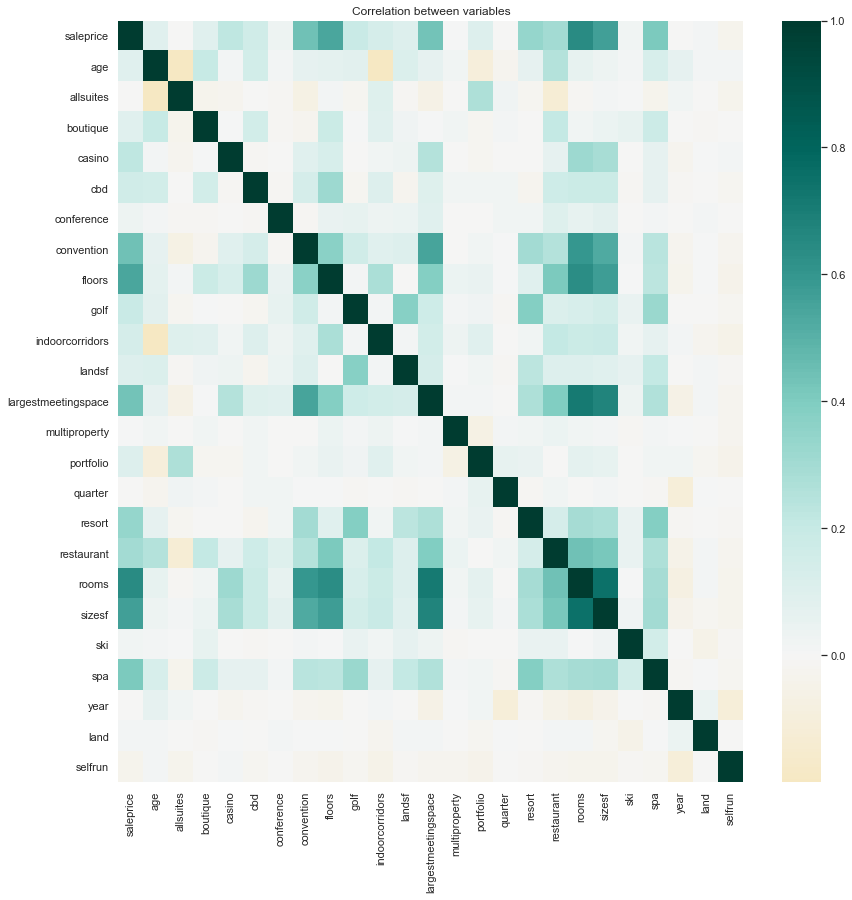

In [5]:
# Correlation between variables
df2analyze = all_data.loc[:, v2include]
# Put target variable first
df2analyze = df2analyze.reindex(
    columns = ['saleprice'] + 
              [c for c in df2analyze.columns 
                   if c != 'saleprice']
)
# Plot correlation matrix
corr = df2analyze.corr()
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(corr,
           annot=False,
           cmap='BrBG',
           center=0,
           ax=ax)
plt.title('Correlation between variables')
plt.show()

None of these correlations is particularly surprising, but at least we don't observe any evidence that points to obvious problems with the data.

Let's now have a closer look at the distributions.

### Distributions
#### Numeric variables

I start with plotting scatterplots of the bivariate correlations examined above. This can sometimes reveal surprising relationships, such as a variable being truncated, which causes bias for ordinary regression.

In [6]:
# Column names of all numeric or binary variables
num_or_bins = df2analyze.select_dtypes(
    include=[np.number]) \
        .columns
# Column names of binary variables 
binaries = [c for c in num_or_bins
                if len(df2analyze.loc[:, c].unique()) == 2]
# Column names of  numeric variables
numerics = [c for c in num_or_bins 
               if c not in binaries]

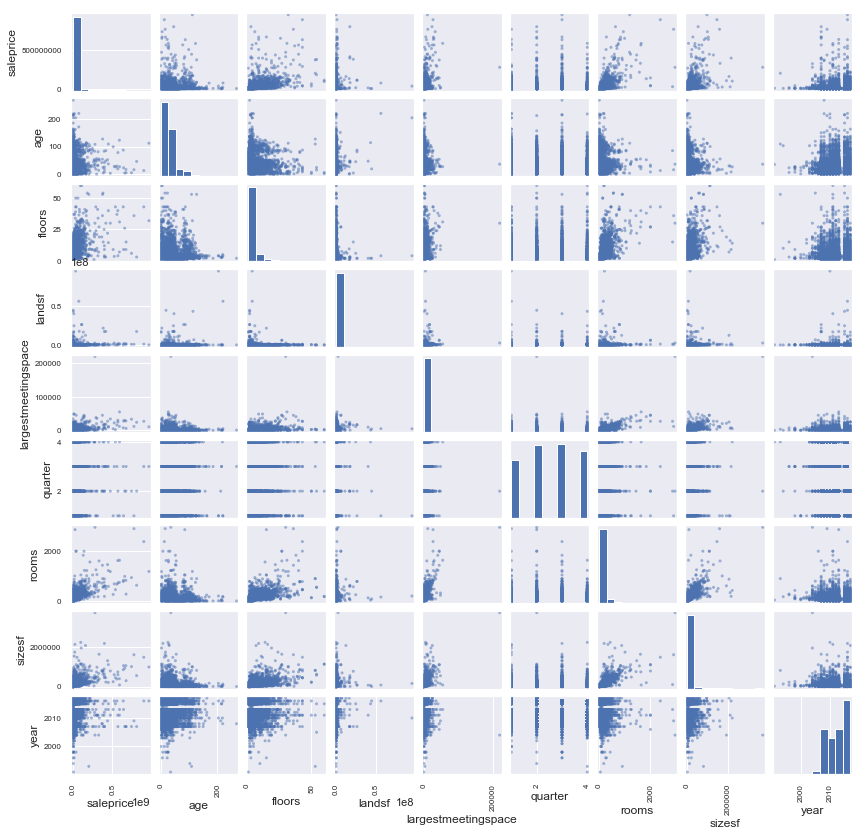

In [7]:
# Scatter matrix
pd.plotting.scatter_matrix(
    all_data.loc[:, numerics],
    figsize=(14,14),
    grid=True)
# Add spacing between plots
fig = plt.gcf()
fig.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show();

This again does not show anything abnormal, such as truncation of variables. As explained above, I don't worry about whether relationships look linear or not.

One particular point to inspect is whether all variables fall into a reasonable range. Since this is harder to see from the above plots, let's only explicitly plot the minimum and maximum values for each variable.

In [8]:
# Data frame of extrema
extrema = df2analyze.loc[:, numerics]  \
    .describe() \
    .loc[['min', 'max']]
# Apply scientific formatting to columns with large values
extrema.style.format('{:.0E}', 
                     subset=['saleprice', 'landsf', 
                             'largestmeetingspace', 'sizesf'])

,saleprice,age,floors,landsf,largestmeetingspace,quarter,rooms,sizesf,year
min,1E+06,0,1,0E+00,0E+00,1,7,1E+03,1991
max,1E+09,268,60,1E+08,2E+05,4,2955,4E+06,2017


These extremes seem reasonable (though a domain expert might been a better position to judge whether the maximum values are too high or not). We also see that year and quarter are floats rather than integers, but we will ignore this because the data set is small enough that this does not introduce any notable computational or memory burden.

#### Binary variables

Next, we take a look at the binary variables. Let's plot the percent true, in sorted order. This tells us the proportion for which the attribute is present.

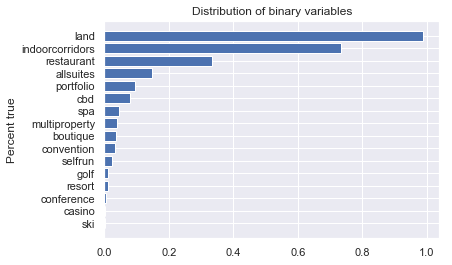

In [9]:
# Percent true for binary variables
binary_prop = df2analyze.loc[:, binaries] \
    .mean() \
    .sort_values()

fig, ax = plt.subplots()
ax.barh(width=binary_prop,
        y=binary_prop.index)
plt.title('Distribution of binary variables')
plt.ylabel('Percent true')
plt.show();

Again, this looks reasonable. All values fall within the range of zero to one, as they should if everything is correct.

The top variable denotes whether a property includes land or not, so it is almost at 100%.  By contrast, it is expected that attributes such as whether the hotel includes a casino or is a ski resort are not very common, so they are almost at 0%.

#### Categorical variables

Finally, we will take a look at all categorical variables. Let's first get all the names.

In [10]:
# Get name of all categorical variables
cats = [v for v in df2analyze.columns
           if v not in num_or_bins]
cats

['category', 'location', 'msa', 'operation', 'saleaffiliation', 'tract']

I start by inspecting the number of categories for each variable.

In [11]:
#  Print numbers of categories for each categorical variable
for cat in cats:
    print(f'{cat}: {len(all_data.loc[:, cat].unique())}')

category: 6
location: 6
msa: 349
operation: 3
saleaffiliation: 189
tract: 637


Three of the six variables have a large number of categories (several hundreds).  We need to keep this in mind when performing one-hot encoding, because this will lead to the creation of a lot of additional columns.  This is not really a problem for gradient boosting, nor is it for regression as long as we use regularization.  However, I will also estimate regression models without regularization for demonstration purposes, because if we do not use regularization – as is common practice – it is hard to say beforehand whether the decrease in bias achieved by including the extra variables is offset by the increase in variance brought about by the large increase in the number of predictors.  Thus, I will estimate two separate models for each learning algorithm, one containing all categorical variables and one leaving out the three categorical variables that have a lot of categories. (These strategies are often called “unpooled” and “pooled”, respectively.)

For the variables that only contain a small number of categories, we can print the name and count for each category.

In [12]:
for cat in ['category', 'location', 'operation']:
    print(cat, '\n',
          all_data.loc[:, cat].value_counts(),
          '\n')

category 
 Economy Class           2208
Upper Midscale Class    1747
Midscale Class          1404
Upscale Class           1223
Upper Upscale Class      706
Luxury Class             262
Name: category, dtype: int64 

location 
 Suburban            3534
Small Metro/Town    1153
Urban               1036
Resort               705
Interstate           600
Airport              522
Name: location, dtype: int64 

operation 
 Franchise           4733
Independent         2285
Chain Management     532
Name: operation, dtype: int64 



This again helps with getting to know the data set, and reveals the useful information that one of these variables, the hotel category, is in fact ordinal. While this is irrelevant for OLS, it can be used to improve the performance of gradient boosting. To do so, we encode this order in terms of ascending integers, so that it can be used by the learning algorithm to make better splits.

We are now ready to start building predictive models in the next notebook.

In [1]:
import os
os.system('jupyter nbconvert --to html 0_intro_EDA.ipynb')

0